## Reddit Posts Initial Analysis
Gulliver Wutz

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
reddit_posts = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_posts.csv')
len(reddit_posts)

180607

### Identify Patch Versions

In [21]:
# Convert 'Created CEST' to datetime
reddit_posts['Created CEST'] = pd.to_datetime(reddit_posts['Created CEST'])

# Time Periods for Patch Numbers
conditions = [
    reddit_posts['Created CEST'] > '2024-05-01',
    (reddit_posts['Created CEST'] > '2024-04-17') & (reddit_posts['Created CEST'] <= '2024-05-01'),
    (reddit_posts['Created CEST'] > '2024-04-03') & (reddit_posts['Created CEST'] <= '2024-04-17'),
    (reddit_posts['Created CEST'] > '2024-03-20') & (reddit_posts['Created CEST'] <= '2024-04-03'),
    (reddit_posts['Created CEST'] > '2024-03-06') & (reddit_posts['Created CEST'] <= '2024-03-20'),
    (reddit_posts['Created CEST'] > '2024-02-22') & (reddit_posts['Created CEST'] <= '2024-03-06'),
    (reddit_posts['Created CEST'] > '2024-02-07') & (reddit_posts['Created CEST'] <= '2024-02-22'),
    (reddit_posts['Created CEST'] > '2024-01-24') & (reddit_posts['Created CEST'] <= '2024-02-07'),
    (reddit_posts['Created CEST'] > '2024-01-10') & (reddit_posts['Created CEST'] <= '2024-02-24'),
    reddit_posts['Created CEST'] <= '2024-01-10'
]

# Patch Numbers
values = [14.9, 14.8,  14.7, 14.6, 14.5, 14.4, 14.3, 14.2, 14.1, 0]

# Create 'Patch' column
reddit_posts['Patch'] = np.select(conditions, values)

### Initial Analysis

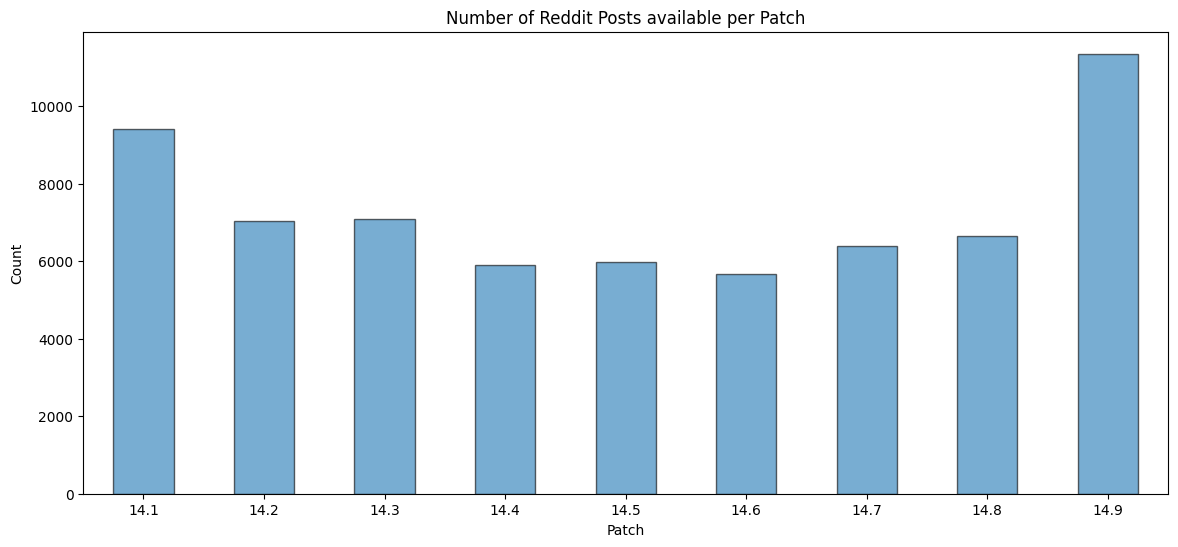

In [22]:
patch_counts = reddit_posts[(reddit_posts['Patch'] != 0)].groupby('Patch').size()

# Plotting the results
plt.figure(figsize=(14, 6))
patch_counts.plot(kind='bar', alpha=0.6, edgecolor='black')
plt.xlabel('Patch')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Number of Reddit Posts available per Patch')
plt.show()

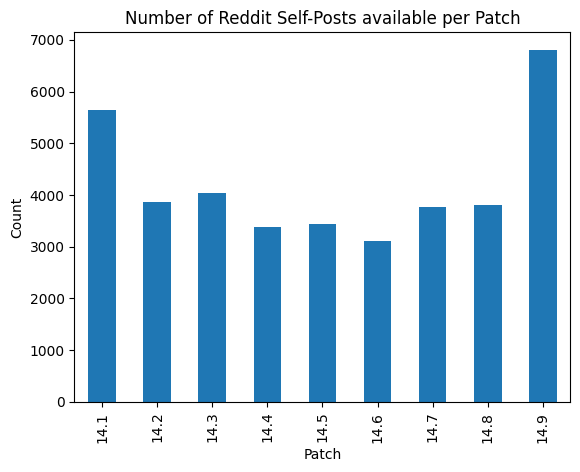

In [23]:
patch_counts = reddit_posts[(reddit_posts['Patch'] != 0) & (reddit_posts['Is Self-post'] == 1)].groupby('Patch').size()

# Plotting the results
patch_counts.plot(kind='bar')
plt.xlabel('Patch')
plt.ylabel('Count')
plt.title('Number of Reddit Self-Posts available per Patch')
plt.show()

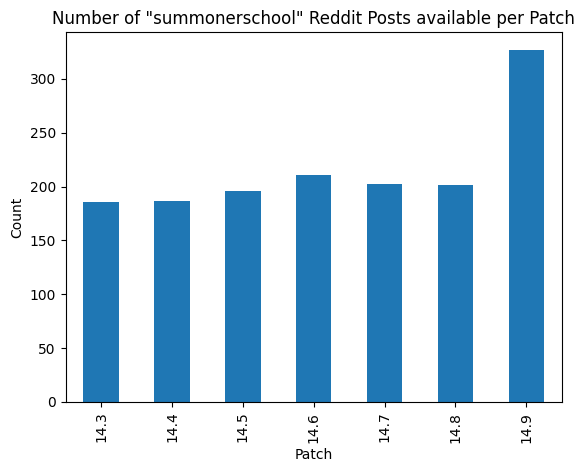

In [24]:
patch_counts = reddit_posts[(reddit_posts['Patch'] != 0) & (reddit_posts['Subreddit'] == 'summonerschool')].groupby('Patch').size()

# Plotting the results
patch_counts.plot(kind='bar')
plt.xlabel('Patch')
plt.ylabel('Count')
plt.title('Number of "summonerschool" Reddit Posts available per Patch')
plt.show()

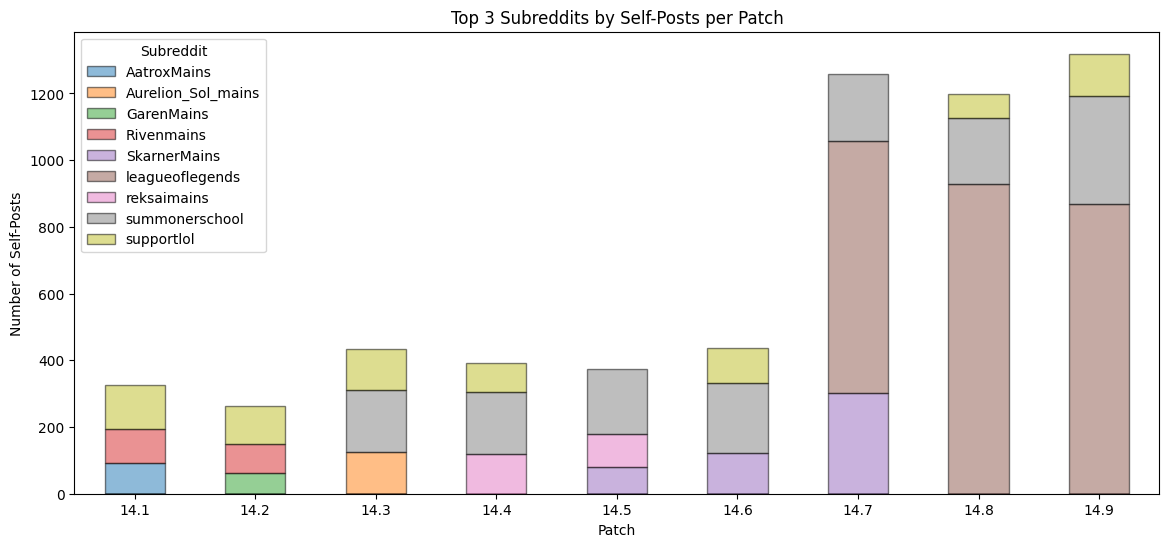

In [40]:
grouped = reddit_posts[(reddit_posts['Patch'] != 0) & (reddit_posts['Is Self-post'] == 1)].groupby(['Patch', 'Subreddit']).size().reset_index(name='counts')

# Top five Subreddits per Patch
top_subreddits_per_patch = grouped.groupby('Patch').apply(
    lambda x: x.nlargest(3, 'counts')
).reset_index(drop=True)

# Pivot the data for plotting
pivot_data = top_subreddits_per_patch.pivot(index='Patch', columns='Subreddit', values='counts').fillna(0)

# Step 5: Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 6), alpha=0.5, edgecolor='black')
plt.title('Top 3 Subreddits by Self-Posts per Patch')
plt.xlabel('Patch')
plt.xticks(rotation=0)
plt.ylabel('Number of Self-Posts')
plt.legend(title='Subreddit')
plt.show()

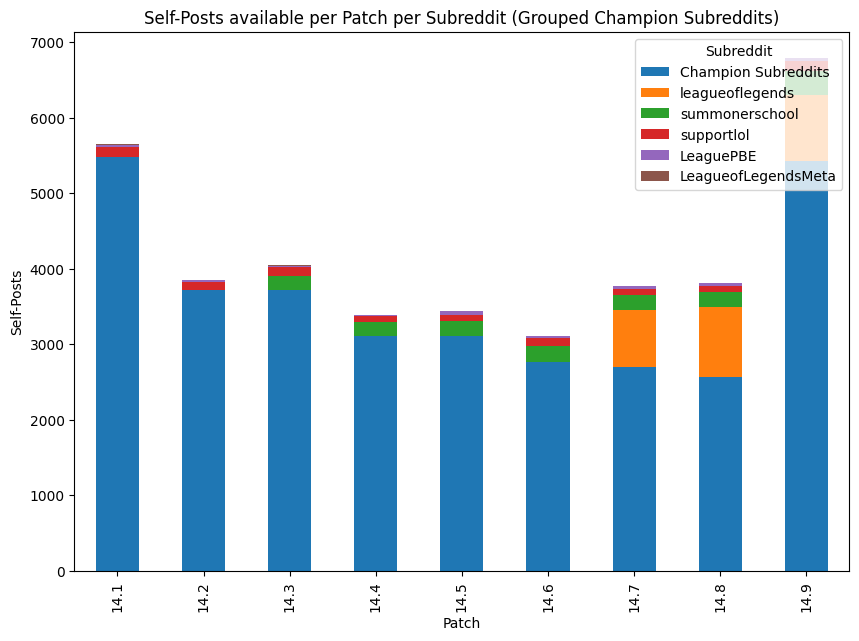

In [37]:
# Generalize over Specific Champion Subreddits
reddit_posts_general = reddit_posts.copy()
subreddits_general = ['summonerschool', 'leagueoflegends', 'LeagueofLegendsMeta', 'LeaguePBE', 'MarksmanMains', 'supportlol']
reddit_posts_general.loc[~reddit_posts_general['Subreddit'].isin(subreddits_general), 'Subreddit'] = 'Champion Subreddits'

grouped = reddit_posts_general[(reddit_posts_general['Patch'] != 0) & (reddit_posts_general['Is Self-post'] == 1)].groupby(['Patch', 'Subreddit']).size().reset_index(name='counts')

# Top five Subreddits per Patch
top_subreddits_per_patch = grouped.groupby('Patch').apply(
    lambda x: x.nlargest(5, 'counts')
).reset_index(drop=True)

# Pivot the data for plotting
pivot_data = top_subreddits_per_patch.pivot(index='Patch', columns='Subreddit', values='counts').fillna(0)

means = pivot_data.mean()
sorted_columns = means.sort_values(ascending=False).index
sorted_pivot_data = pivot_data[sorted_columns]

# Create the stacked bar chart with the sorted data
sorted_pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Self-Posts available per Patch per Subreddit (Grouped Champion Subreddits)')
plt.xlabel('Patch')
plt.ylabel('Self-Posts')
plt.legend(title='Subreddit', loc='upper right')  # You can adjust the legend location if needed
plt.show()


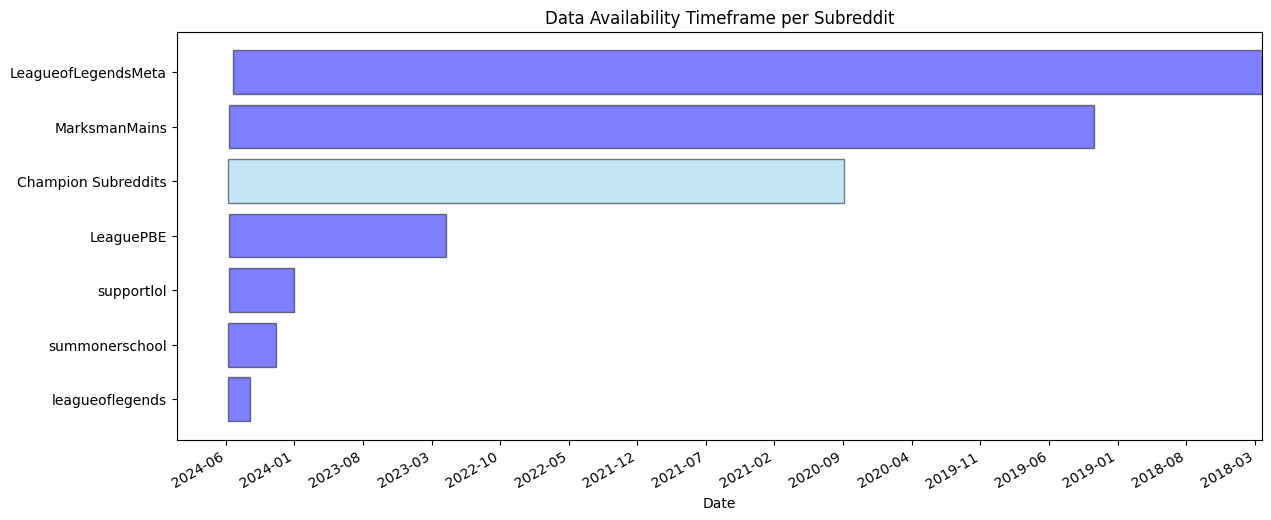

In [39]:
grouped = reddit_posts_general.groupby('Subreddit')['Created CEST'].agg([min, max])
grouped['duration'] = grouped['max'] - grouped['min']
grouped = grouped.sort_values('duration', ascending=True)
grouped = grouped.reset_index()

# Set figure size
plt.figure(figsize=(14, 6))

# Create horizontal bars with conditional coloring
for index, row in grouped.iterrows():
    color = 'skyblue' if row['Subreddit'] == 'Champion Subreddits' else 'blue'
    plt.barh(row['Subreddit'], row['duration'], left=row['min'], color=color, alpha=0.5, edgecolor='black')

# Formatting the plot
plt.xlabel('Date')
plt.title('Data Availability Timeframe per Subreddit')

# Invert x-axis
plt.gca().invert_xaxis()

# Set x-axis major ticks formatter and locator
locator = mdates.MonthLocator(interval=5)
formatter = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

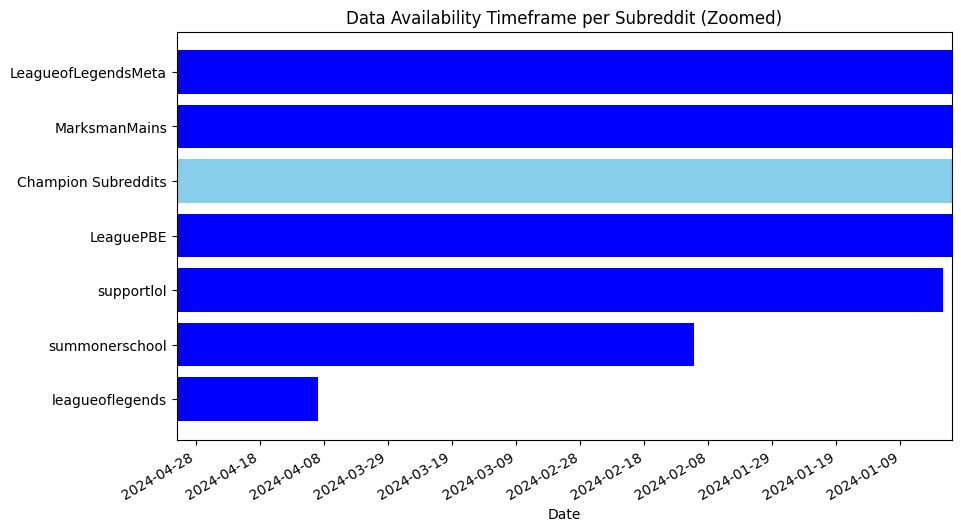

In [12]:
grouped = reddit_posts_general.groupby('Subreddit')['Created CEST'].agg([min, max])
grouped['duration'] = grouped['max'] - grouped['min']
grouped = grouped.sort_values('duration', ascending=True)
grouped = grouped.reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create horizontal bars with conditional coloring
for index, row in grouped.iterrows():
    color = 'skyblue' if row['Subreddit'] == 'Champion Subreddits' else 'blue'
    plt.barh(row['Subreddit'], row['duration'], left=row['min'], color=color)

# Formatting the plot
plt.xlabel('Date')
plt.title('Data Availability Timeframe per Subreddit (Zoomed)')

# Invert x-axis
plt.gca().invert_xaxis()

# Set x-axis major ticks formatter and locator
locator = mdates.DayLocator(interval=10)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Set the x-axis limits
start_date = dt.datetime(2024, 5, 1)
end_date = dt.datetime(2024, 1, 1)
plt.gca().set_xlim([start_date, end_date])

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

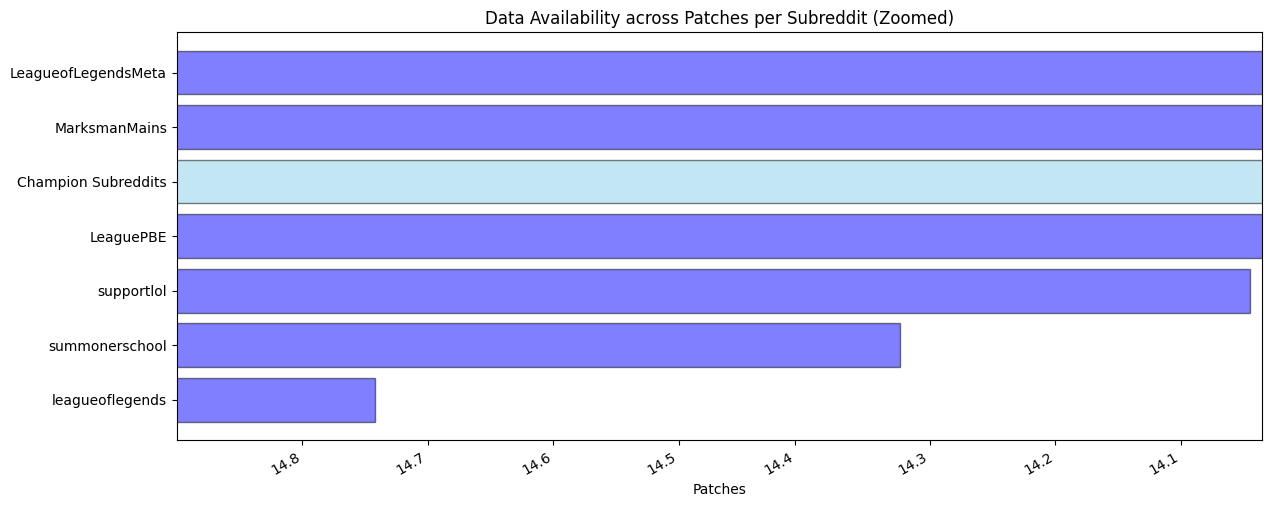

In [49]:
patches = {
    '14.8': pd.Timestamp('2024-04-17'),
    '14.7': pd.Timestamp('2024-04-03'),
    '14.6': pd.Timestamp('2024-03-20'),
    '14.5': pd.Timestamp('2024-03-06'),
    '14.4': pd.Timestamp('2024-02-22'),
    '14.3': pd.Timestamp('2024-02-07'),
    '14.2': pd.Timestamp('2024-01-24'),
    '14.1': pd.Timestamp('2024-01-10'),
}


grouped = reddit_posts_general.groupby('Subreddit')['Created CEST'].agg([min, max])
grouped['duration'] = grouped['max'] - grouped['min']
grouped = grouped.sort_values('duration', ascending=True)
grouped = grouped.reset_index()

# Set figure size
plt.figure(figsize=(14, 6))

# Create horizontal bars with conditional coloring
for index, row in grouped.iterrows():
    color = 'skyblue' if row['Subreddit'] == 'Champion Subreddits' else 'blue'
    plt.barh(row['Subreddit'], row['duration'], left=row['min'], color=color, alpha=0.5, edgecolor='black')

# Formatting the plot
plt.xlabel('Patches')
plt.title('Data Availability across Patches per Subreddit (Zoomed)')

# Invert x-axis
plt.gca().invert_xaxis()

# Set x-axis major ticks formatter and locator
locator = mdates.DayLocator(interval=10)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Convert patch dates to labels
plt.xticks(list(patches.values()), list(patches.keys()))  # Set custom x-ticks


# Set the x-axis limits
start_date = dt.datetime(2024, 5, 1)
end_date = dt.datetime(2024, 1, 1)
plt.gca().set_xlim([start_date, end_date])

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

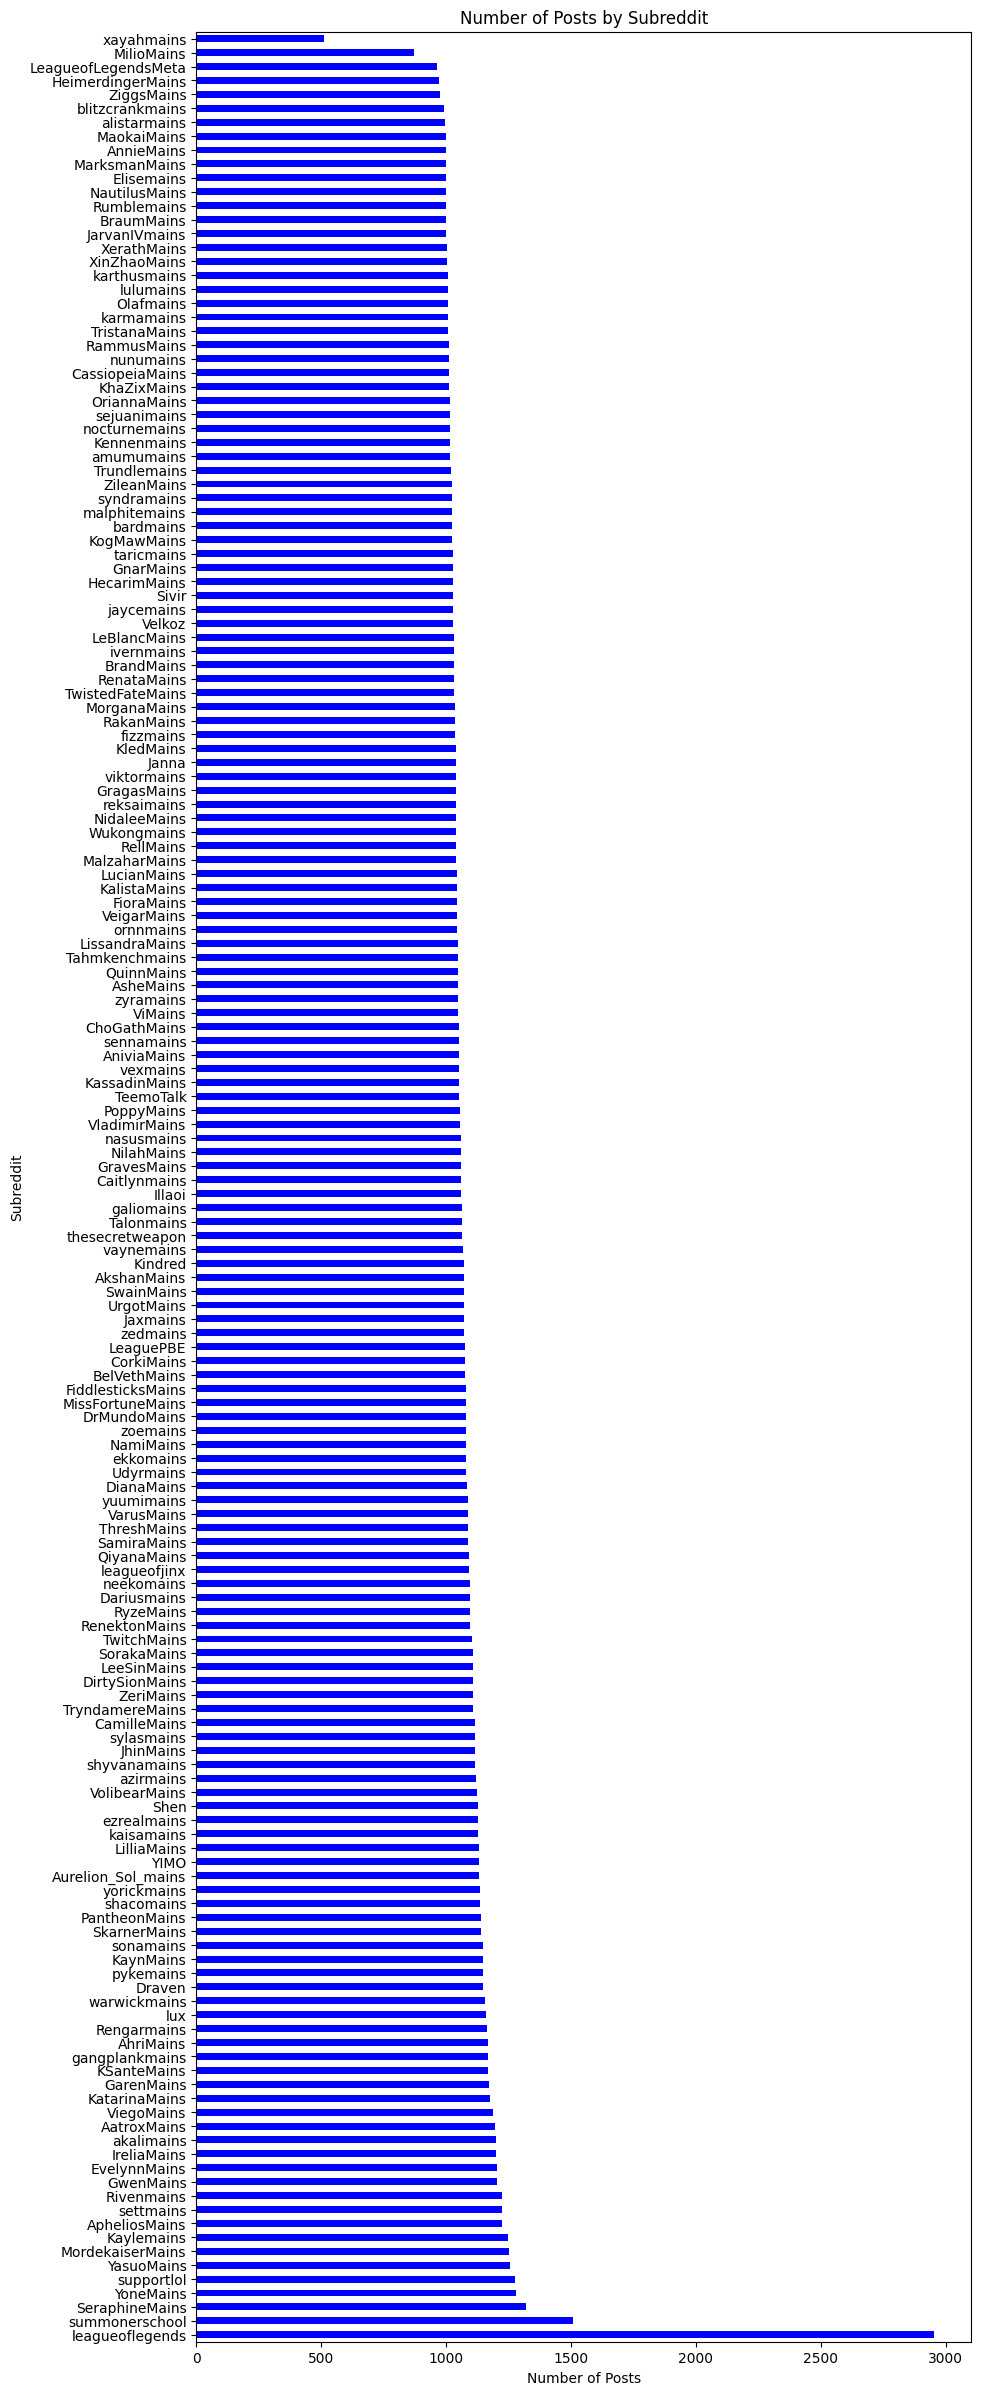

In [14]:
subreddit_counts = reddit_posts.groupby('Subreddit').size()

# Plotting
plt.figure(figsize=(10, 30))
subreddit_counts.sort_values(ascending=False).plot(kind='barh', color='blue')
plt.xlabel('Number of Posts')
plt.title('Number of Posts by Subreddit')
plt.show()